In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
import os

os.getcwd()

'/content'

In [ ]:
# Assuming X, y are defined somewhere above this code block
# Separate the features and the target variable
# df = pd.read_csv('ML_data.csv')

!nvidia-smi

Wed Feb 21 23:42:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Read the CSV file into a DataFrame
df_00 = pd.read_csv('drive/MyDrive/440/ML_data.csv')

In [5]:
df, df_unseen = train_test_split(df_00, test_size = 0.1, random_state=42)

In [8]:
from IPython.display import display

display(df)

,latitude,longitude,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,is_shared_bathroom,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
72703,40.696558,-73.912174,1,1,49,0,5.00,4.84,5.00,5.00,5.00,5.00,0.02,4.0,0,0,0,1,0
50067,26.154360,-80.183260,2,2,135,147,4.84,4.90,4.95,4.95,4.50,4.81,4.37,1.0,0,1,0,0,0
41944,34.157582,-118.642910,6,3,498,0,4.92,4.87,4.97,4.96,5.00,4.76,0.09,1.0,0,1,0,0,0
51336,26.127160,-80.126090,4,2,192,92,4.75,4.78,4.86,4.88,4.92,4.80,3.28,2.0,0,1,0,0,0
95075,40.689410,-73.934820,2,1,90,0,4.89,5.00,5.00,5.00,5.00,4.00,0.11,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,26.009850,-80.115870,6,2,206,32,4.73,4.88,4.79,4.67,4.79,4.55,1.89,1.0,0,1,0,0,0
76820,40.678000,-73.963850,2,1,250,6,5.00,5.00,5.00,5.00,5.00,4.83,0.33,1.0,0,1,0,0,0
103694,47.539990,-122.274960,4,2,130,55,4.91,4.76,4.89,4.87,4.71,4.87,1.08,2.0,0,1,0,0,0
860,34.079660,-118.354380,3,2,135,0,5.00,4.97,5.00,5.00,4.97,5.00,0.71,1.0,0,1,0,0,0


In [17]:
X = df.drop('price', axis=1)  # X contains all columns except 'price'
y = df['price']     # y is the target variable

In [27]:
# Split data into training, calibration, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
import statsmodels.api as sm

# Selecting features and target variable
X = df[['latitude','longitude', 'accommodates', 'beds', 'price', 'number_of_reviews','review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','bathrooms']]
y = df['price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the quantile regression model for the 5th and 95th quantiles
model_5th_quantile = sm.QuantReg(y, X).fit(q=0.05)
model_95th_quantile = sm.QuantReg(y, X).fit(q=0.95)

# Return summaries of both models
summary_5th = model_5th_quantile.summary()
summary_95th = model_95th_quantile.summary()

(summary_5th, summary_95th)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                          QuantReg Regression Results                          
 Dep. Variable:                  price   Pseudo R-squared:                1.000
 Model:                       QuantReg   Bandwidth:                   4.238e-13
 Method:                 Least Squares   Sparsity:                    7.248e-10
 Date:                Tue, 12 Mar 2024   No. Observations:                97548
 Time:                        16:50:54   Df Residuals:                    97533
                                         Df Model:                           14
                                   coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------------------------------------------
 const                        7.049e-11   3.57e-11      1.973      0.048     4.8e-13     1.4e-10
 latitude                    -3.912e-13   3.89e-13     -1.005      0.315   -1.15e-12    3.72e-13
 l

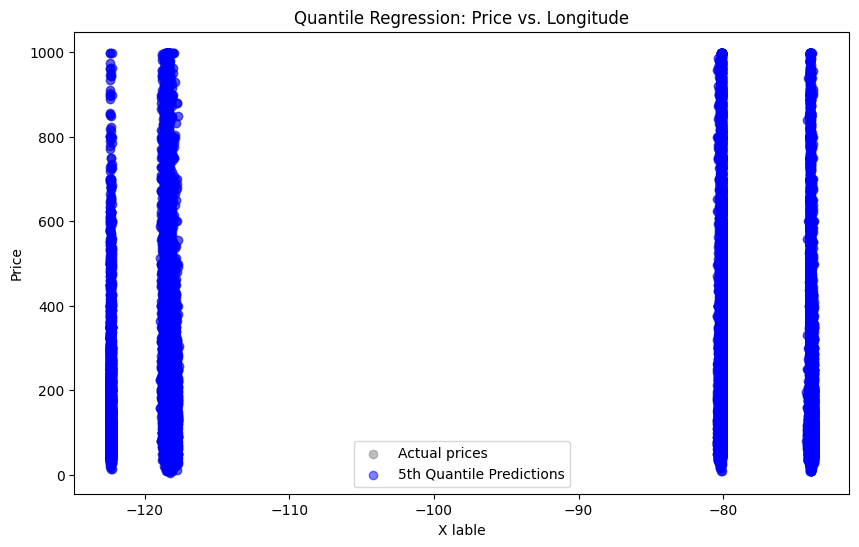

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generating predictions for the 5th and 95th quantiles
predictions_5th = model_5th_quantile.predict(X)
predictions_95th = model_95th_quantile.predict(X)

# Extracting longitude for plotting (assuming it's the second feature in X after the constant)
x001 = X['longitude']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual prices vs. longitude
plt.scatter(x001, y, color='grey', alpha=0.5, label='Actual prices')

# Scatter plot of 5th quantile predictions vs. longitude
plt.scatter(x001, predictions_5th, color='blue', alpha=0.5, label='5th Quantile Predictions')

# Scatter plot of 95th quantile predictions vs. longitude
#plt.scatter(x001, predictions_95th, color='red', alpha=0.5, label='95th Quantile Predictions')

plt.xlabel('X lable')
plt.ylabel('Price')
plt.title('Quantile Regression: Price vs. Longitude')
plt.legend()
plt.show()


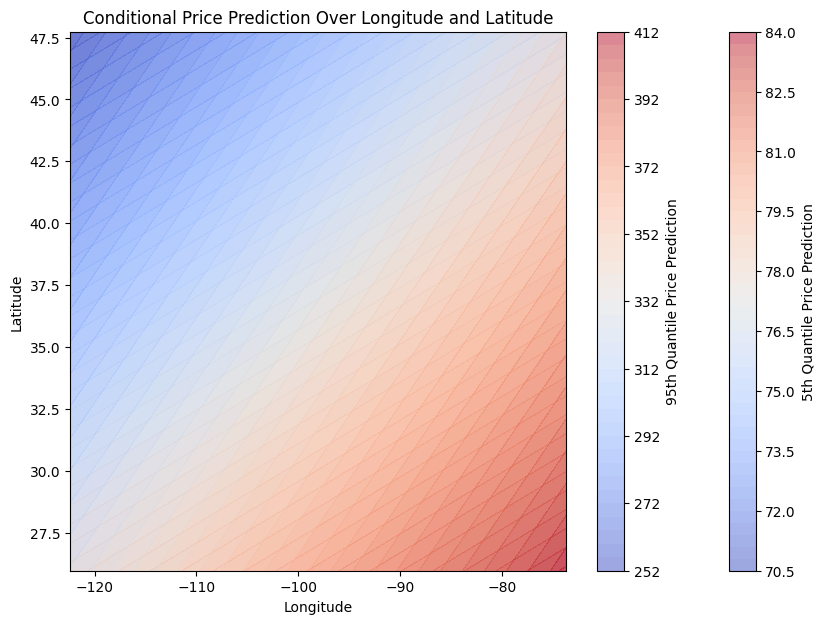

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Selecting features and target variable
X = df[['latitude', 'longitude', 'accommodates', 'beds', 'number_of_reviews', 'review_scores_rating', 'bathrooms', 'room_type_Entire home/apt']]
y = df['price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the quantile regression model for the 5th and 95th quantiles
model_5th_quantile = sm.QuantReg(y, X).fit(q=0.05)
model_95th_quantile = sm.QuantReg(y, X).fit(q=0.95)

# Create a grid of latitude and longitude values
latitude_range = np.linspace(df['latitude'].min(), df['latitude'].max(), 100)
longitude_range = np.linspace(df['longitude'].min(), df['longitude'].max(), 100)
longitude_grid, latitude_grid = np.meshgrid(longitude_range, latitude_range)

# Prepare grid data for prediction
grid_data = pd.DataFrame({
    'const': 1,  # Adding a constant term for the intercept
    'latitude': latitude_grid.ravel(),
    'longitude': longitude_grid.ravel(),
    # Assuming constant values for other features for simplification
    'accommodates': np.median(df['accommodates']),
    'beds': np.median(df['beds']),
    'number_of_reviews': np.median(df['number_of_reviews']),
    'review_scores_rating': np.median(df['review_scores_rating']),
    'bathrooms': np.median(df['bathrooms']),
    'room_type_Entire home/apt': 1,  # Assuming prediction for entire home/apt
})

# Predictions for 5th and 95th quantiles
predictions_5th = model_5th_quantile.predict(grid_data)
predictions_95th = model_95th_quantile.predict(grid_data)

# Reshape predictions to the grid's shape
predictions_5th_reshaped = predictions_5th.values.reshape(latitude_grid.shape)
predictions_95th_reshaped = predictions_95th.values.reshape(latitude_grid.shape)

# Visualization
plt.figure(figsize=(10, 7))
plt.contourf(longitude_grid, latitude_grid, predictions_5th_reshaped, levels=50, cmap='coolwarm', alpha=0.5)
plt.colorbar(label='5th Quantile Price Prediction')
plt.contourf(longitude_grid, latitude_grid, predictions_95th_reshaped, levels=50, cmap='coolwarm', alpha=0.5)
plt.colorbar(label='95th Quantile Price Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Conditional Price Prediction Over Longitude and Latitude')
plt.show()


In [ ]:
from IPython.display import display

display(df)

,latitude,longitude,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,is_shared_bathroom,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
72703,40.696558,-73.912174,1,1,49,0,5.00,4.84,5.00,5.00,5.00,5.00,0.02,4.0,0,0,0,1,0
50067,26.154360,-80.183260,2,2,135,147,4.84,4.90,4.95,4.95,4.50,4.81,4.37,1.0,0,1,0,0,0
41944,34.157582,-118.642910,6,3,498,0,4.92,4.87,4.97,4.96,5.00,4.76,0.09,1.0,0,1,0,0,0
51336,26.127160,-80.126090,4,2,192,92,4.75,4.78,4.86,4.88,4.92,4.80,3.28,2.0,0,1,0,0,0
95075,40.689410,-73.934820,2,1,90,0,4.89,5.00,5.00,5.00,5.00,4.00,0.11,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,26.009850,-80.115870,6,2,206,32,4.73,4.88,4.79,4.67,4.79,4.55,1.89,1.0,0,1,0,0,0
76820,40.678000,-73.963850,2,1,250,6,5.00,5.00,5.00,5.00,5.00,4.83,0.33,1.0,0,1,0,0,0
103694,47.539990,-122.274960,4,2,130,55,4.91,4.76,4.89,4.87,4.71,4.87,1.08,2.0,0,1,0,0,0
860,34.079660,-118.354380,3,2,135,0,5.00,4.97,5.00,5.00,4.97,5.00,0.71,1.0,0,1,0,0,0


In [ ]:
model = RandomForestRegressor(
    n_estimators=20,  # Increased from 100 to 300
    max_depth=25,      # Limiting tree depth
    min_samples_split=10,  # Increasing to require more samples to split a node
    min_samples_leaf=4,    # Increasing to require more samples at a leaf node
    max_features='sqrt',   # Using square root of total features for each split
    bootstrap=True,        # Keeping bootstrap to True
    random_state=42
)

In [ ]:
'''
 model = RandomForestRegressor(
    n_estimators=300,  # Increased number of trees
    max_depth=20,  # Set max depth of trees
    min_samples_split=4,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider at every split
    random_state=42
)
'''

In [ ]:
# Train the Random Forest model
# model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=250, random_state=42)

In [ ]:
# Get the parameters of the model
# parameters = model.get_params()

# Print the parameters
# print(parameters)

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,  # Increased from 100 to 300
    max_depth=20,      # Limiting tree depth
    min_samples_split=10,  # Increasing to require more samples to split a node
    min_samples_leaf=5,    # Increasing to require more samples at a leaf node
    max_features='sqrt',   # Using square root of total features for each split
    bootstrap=True,        # Keeping bootstrap to True
    random_state=42
)

# Train the Random Forest model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 72.63384160052685
Mean Squared Error (MSE): 13236.904028405941
Root Mean Squared Error (RMSE): 115.05174500374143
R^2 Score: 0.543205446416112


In [ ]:
importances = model.feature_importances_
features = X_train.columns
feature_importances = pd.Series(importances, index=features)
sorted_importances = feature_importances.sort_values(ascending=False)

In [ ]:
# top_n = 5  # Change this value to display a different number of top features
# print(f"Top {top_n} Features:")
# print(sorted_importances.head(top_n))

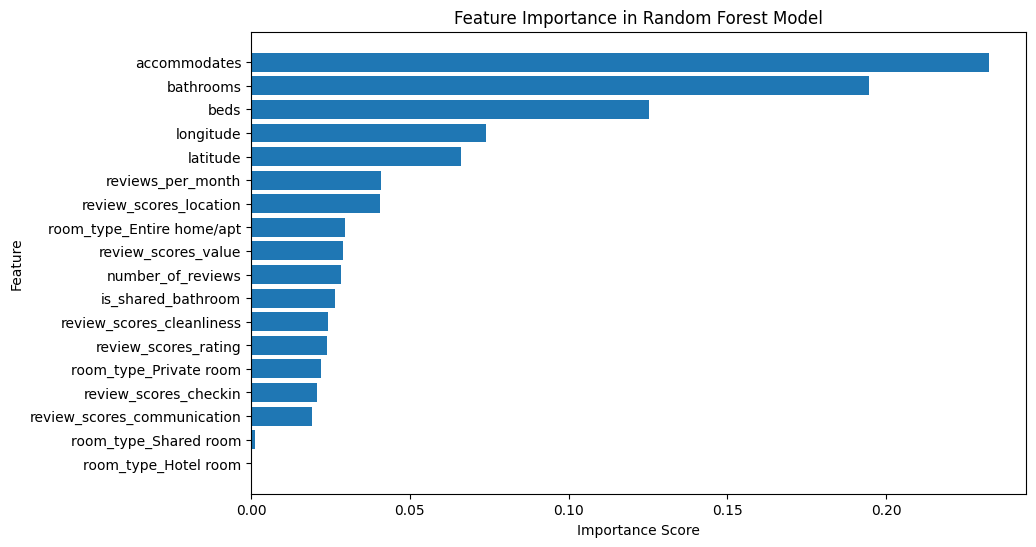

In [ ]:
importances = model.feature_importances_
features = X_train.columns
feature_importances = pd.Series(importances, index=features)
sorted_importances = feature_importances.sort_values(ascending=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_importances.index, sorted_importances.values)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [ ]:
# Split data into training, calibration, and testing sets
'''
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)
X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
'''

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd



# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gbr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 97.82205203866656
Mean Squared Error: 20738.36270369561
R^2 Score: 0.28433634383340045


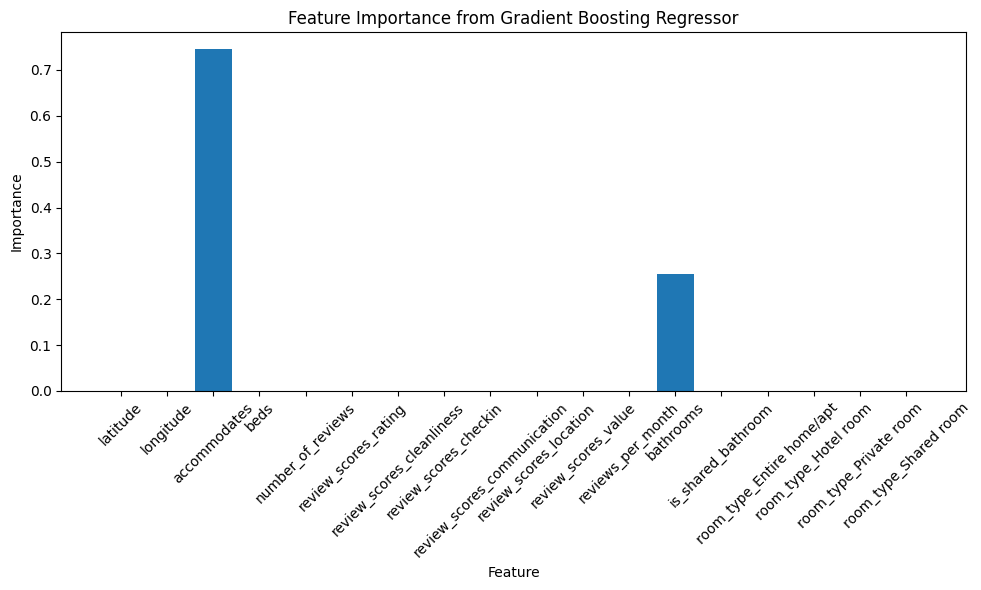

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have X_train and y_train from your dataset
# and you have run the previous steps including fitting the model

# Get feature importance
feature_importance = gbr.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Feature')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.ylabel('Importance')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Support Vector Machine regressor
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 78.47997128146947
Mean Squared Error: 17267.655799938722
R^2 Score: 0.4041075537265848


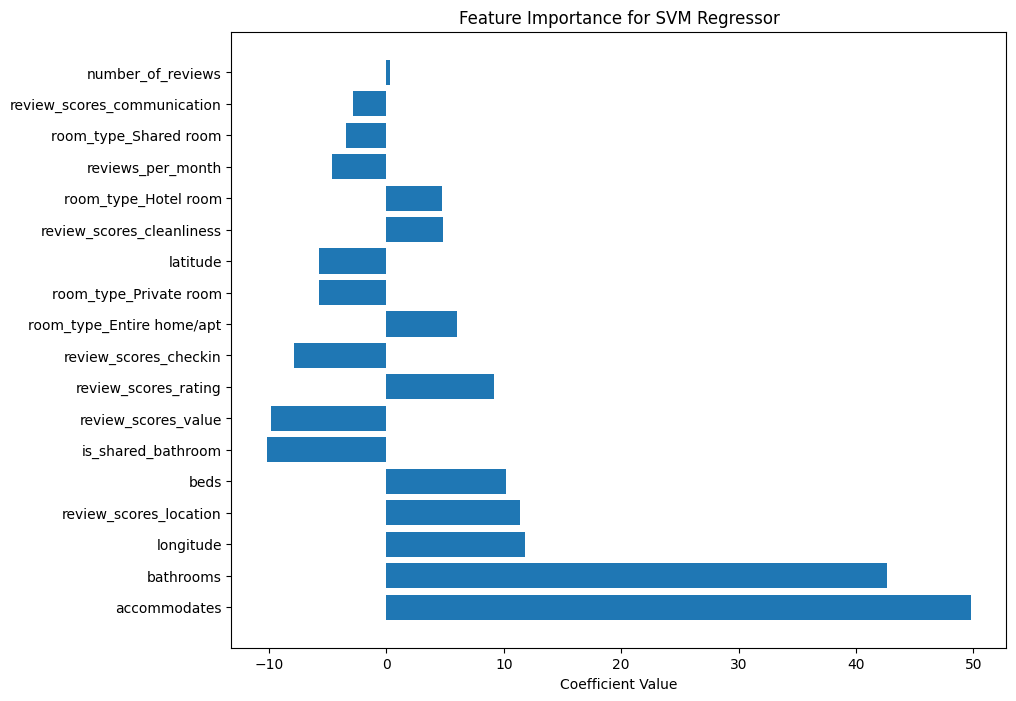

In [ ]:
# Extract coefficients for linear kernel
coefficients = svr.coef_.flatten()

# Plot feature importance
plt.figure(figsize=(10, 8))
sorted_idx = np.argsort(abs(coefficients))[::-1]
plt.barh(np.array(feature_names)[sorted_idx], coefficients[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for SVM Regressor')
plt.show()

In [ ]:
!pip install xgboost

In [28]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, n_estimators = 300, gamma=0.1)
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error (MAE): 10.388887690056482
Mean Squared Error: 258.90237984053806
R^2 Score: 0.9910654941089494


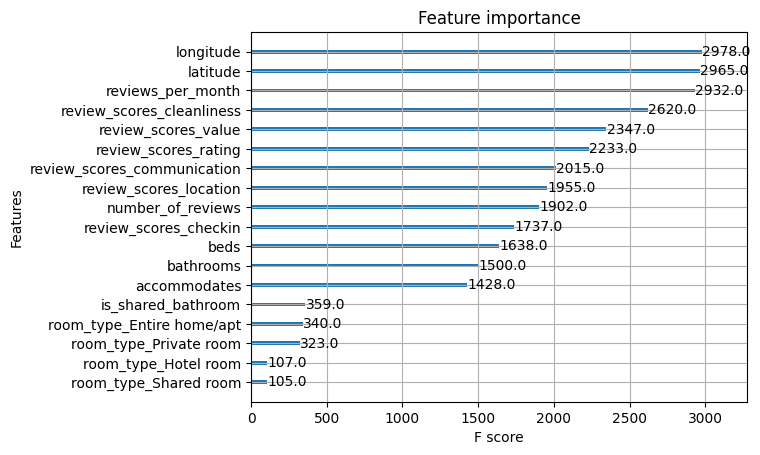

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plot_importance(xg_reg)
plt.show()

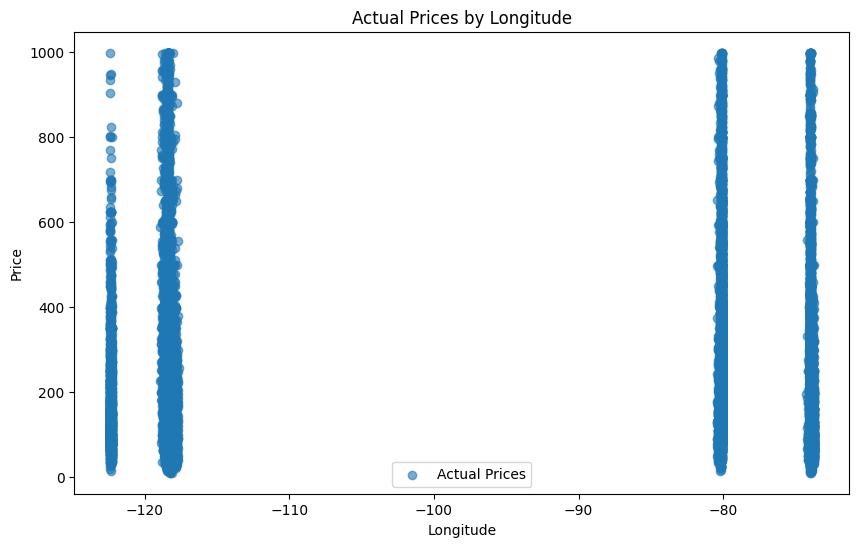

In [33]:
import matplotlib.pyplot as plt

# Assuming y_pred contains your model predictions
# And X_test contains the 'longitude' feature

# Plotting actual vs predicted prices based on longitude
plt.figure(figsize=(10, 6))

# Scatter plot for actual prices
plt.scatter(X_test['longitude'], y_test, alpha=0.6, label='Actual Prices')

# Scatter plot for predicted prices
#plt.scatter(X_test['longitude'], y_pred, alpha=0.6, color='red', label='Predicted Prices')

plt.title('Actual Prices by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.legend()
plt.show()


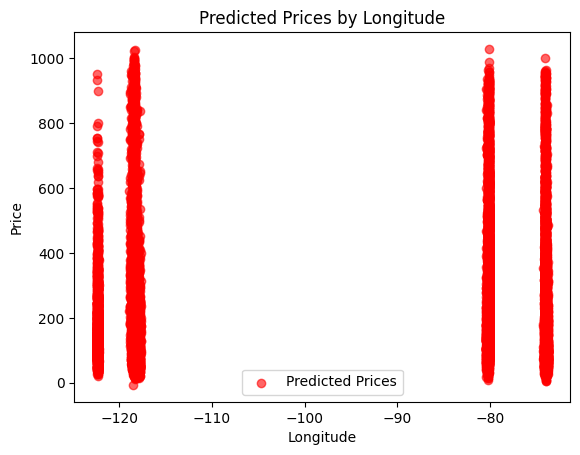

In [34]:
plt.scatter(X_test['longitude'], y_pred, alpha=0.6, color='red', label='Predicted Prices')
plt.title('Predicted Prices by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Predict on calibration data
y_calib_pred = xg_reg.predict(X_calib)

In [ ]:
# Calculate conformity scores (absolute errors)
conformity_scores = np.abs(y_calib_pred - y_calib)

# Determine the quantile for the prediction interval
alpha = 0.1  # For a 95% prediction interval
quantile = np.quantile(conformity_scores, 1 - alpha)

In [ ]:
# conformity_scores

In [ ]:
quantile

162.09398040771487

In [ ]:
# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate prediction intervals
lower_bounds = y_test_pred - quantile
upper_bounds = y_test_pred + quantile

In [ ]:
# Check if true y values fall within the prediction intervals
inside_interval = (y_test >= lower_bounds) & (y_test <= upper_bounds)



# Calculate the proportion of y_test values that fall within the prediction intervals
coverage_accuracy = np.mean(inside_interval)

# Print results
# print(f"Prediction interval for the first test instance: [{lower_bounds[50]}, {upper_bounds[50]}]")
print(f"Accuracy of the prediction intervals (Coverage): {coverage_accuracy * 100:.2f}%")

Accuracy of the prediction intervals (Coverage): 89.83%
